<a href="https://colab.research.google.com/github/binoneto-dev/binoneto-dev/blob/main/Profissao_Analista_de_dados_M13_Exercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Data Wrangling II
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Agregação e Ordenação;</li>
  <li>Combinação;</li>
  <li>Técnicas Avançadas.</li>
</ol>

---

# **Exercícios**

Neste exercícios, vamos trabalhar com dados geográficos, demográficos e econômicos do Brasil. Vamos manipular e combinar dados de duas frentes distintas para poder responder perguntas de negócios.

## 1\. Data Wrangling

### **1.1. Estados**

O arquivo `estados-bruto.xml` contém informações sobre estados (nome, sigla e região). **Carregue-o na máquina virtual do Google Colab**. Um arquivo do tipo XML é similar a um arquivo do tipo HTML, exemplo do estado do Acre:

```xml
<ESTADO>
  <ID>1</ID>
  <NOME>ACRE</NOME>
  <IDCAPITAL>16</IDCAPITAL>
  <SIGLA>AC</SIGLA>
  <REGIAO>NORTE</REGIAO>
</ESTADO>
```

Utilize o pacote Python `beautifulsoup4` para extrair os dados do arquivo `estados-bruto.xml` providenciado. Salve os dados extraidos no arquivo `estados-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;sigla;regiao
ACRE;AC;NORTE
ALAGOAS;AL;NORDESTE
AMAPA;AP;NORTE
```

**Dica**: Utilize o parser de xml chamado `lxml` do `beautifulsoup4`.

In [3]:
# ler o arquivo estados-bruto.xml, utilize o xml parser chamado lxml
from bs4 import BeautifulSoup

NOME_ARQUIVO_FONTE = 'estados-bruto.xml'

with open(NOME_ARQUIVO_FONTE) as xml:
  fonte = BeautifulSoup(xml, "lxml")



<ipython-input-3-214de0812af6>:7: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  fonte = BeautifulSoup(xml, "lxml")


In [4]:
# visualize os resultados

fonte

<?xml version="1.0" encoding="utf-8" ?><html><body><estados>
<estado>
<id>1</id>
<nome>ACRE</nome>
<idcapital>16</idcapital>
<sigla>AC</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>2</id>
<nome>ALAGOAS</nome>
<idcapital>68</idcapital>
<sigla>AL</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>3</id>
<nome>AMAPA</nome>
<idcapital>131</idcapital>
<sigla>AP</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>4</id>
<nome>AMAZONAS</nome>
<idcapital>178</idcapital>
<sigla>AM</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>5</id>
<nome>BAHIA</nome>
<idcapital>536</idcapital>
<sigla>BA</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>6</id>
<nome>CEARA</nome>
<idcapital>676</idcapital>
<sigla>CE</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>7</id>
<nome>DISTRITO FEDERAL</nome>
<idcapital>916</idcapital>
<sigla>DF</sigla>
<regiao>CENTRO-OESTE</regiao>
</estado>
<estado>
<id>8</id>
<nome>ESPIRITO SANTO</nome>
<idcapital>879</idcapital>
<sigla>ES</sigla

In [5]:
# manipule os dados
estados = fonte.find_all("nome")
estados = [estado.string for estado in estados]

siglas = fonte.find_all("sigla")
siglas = [sigla.string for sigla in siglas]

regioes = fonte.find_all("regiao")
regioes = [regiao.string for regiao in regioes]

print(estados)
print(siglas)
print(regioes)


['ACRE', 'ALAGOAS', 'AMAPA', 'AMAZONAS', 'BAHIA', 'CEARA', 'DISTRITO FEDERAL', 'ESPIRITO SANTO', 'GOIAS', 'MARANHAO', 'MATO GROSSO', 'MATO GROSSO DO SUL', 'PARA', 'PARAIBA', 'PARANA', 'PERNAMBUCO', 'PIAUI', 'RIO DE JANEIRO', 'RIO GRANDE DO NORTE', 'RIO GRANDE DO SUL', 'RONDONIA', 'RORAIMA', 'SANTA CATARINA', 'SAO PAULO', 'SERGIPE', 'TOCANTINS', 'MINAS GERAIS']
['AC', 'AL', 'AP', 'AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MT', 'MS', 'PA', 'PB', 'PR', 'PE', 'PI', 'RJ', 'RN', 'RS', 'RO', 'RR', 'SC', 'SP', 'SE', 'TO', 'MG']
['NORTE', 'NORDESTE', 'NORTE', 'NORTE', 'NORDESTE', 'NORDESTE', 'CENTRO-OESTE', 'SUDESTE', 'CENTRO-OESTE', 'NORDESTE', 'CENTRO-OESTE', 'CENTRO-OESTE', 'NORTE', 'NORDESTE', 'SUL', 'NORDESTE', 'NORDESTE', 'SUDESTE', 'NORDESTE', 'SUL', 'NORTE', 'NORTE', 'SUL', 'SUDESTE', 'NORDESTE', 'NORTE', 'SUDESTE']


In [6]:
# escrever o conteudo extraido no arquivo estados-limpo.csv separados por ;
import pandas as pd

NOME_ARQUIVO_DESTINO = 'estados-limpo.csv'

# criando um dicionário e convertendo em dataframe
estados_br = pd.DataFrame({
    "estado": estados,
    "sigla": siglas,
    "regiao": regioes,
})

estados_br.to_csv(NOME_ARQUIVO_DESTINO, index=False, sep=";")



### **1.2. Cidades**

O arquivo `cidades-bruto.csv` contém informações demográficas e socioeconomicas das cidades do Brasil. **Carregue-o na máquina virtual do Google Colab**. Utilize o pacote Python `pandas` para extrair os dados do arquivo `cidades-bruto.xml` providenciado. Seguindo as seguintes especificações:

1. Apenas dados do censo de 2010;
1. Apenas as colunas UF, Nome, PIB, Pop_est_2009 e PIB_percapita.

Salve os dados extraidos no arquivo `cidades-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;cidade;populacao;pib;pib_percapita
BAHIA;TREMEDAL;18433;57883.9921875;3140.23999023
RIO GRANDE DO SUL;TURUÇU;4000;45723875;11430.96972656
ESPIRITO SANTO;VITÓRIA;320156;19782628;61790.58984375
```

In [13]:
# ler o arquivo cidades-bruto.csv

import pandas as pd

NOME_ARQUIVO_FONTE = 'cidades-bruto.csv'

cidades_br = pd.read_csv(NOME_ARQUIVO_FONTE)

In [42]:
# Extraindo as colunas de interesse correspondente ao Censo de 2010

cidades_br = cidades_br.query('Censo == 2010')[['UF', 'nome', 'Pop_est_2009', 'PIB', 'PIB_percapita']]


In [43]:
cidades_br = cidades_br.rename(
    columns={
      "UF": "estado",
      "nome": "cidade",
      "Pop_est_2009": "populacao",
      "PIB": "pib",
      "PIB_percapita": "pib_percapita"
      }
)


In [44]:
# visualize os resultados

cidades_br.head(3)


,estado,cidade,populacao,pib,pib_percapita
0,BAHIA,Tremedal,18433,5.788399e+04,3140.239990
1,RIO GRANDE DO SUL,Turuçu,4000,4.572388e+04,11430.969727
2,ESPIRITO SANTO,Vitória,320156,1.978263e+07,61790.589844


In [15]:
# manipule os dados
cidades_br.shape

(5566, 12)

In [16]:
cidades_br.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5566 entries, 0 to 5565
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FID            5566 non-null   object 
 1   gid            5566 non-null   int64  
 2   UF             5566 non-null   object 
 3   nome           5565 non-null   object 
 4   Censo          5560 non-null   float64
 5   PIB            5566 non-null   float64
 6   Pop_est_2009   5566 non-null   int64  
 7   PIB_percapita  5566 non-null   float64
 8   Descrição      5566 non-null   object 
 9   legenda        5566 non-null   object 
 10  classe         5566 non-null   int64  
 11  geom           5566 non-null   object 
dtypes: float64(3), int64(3), object(6)
memory usage: 521.9+ KB


In [17]:
cidades_br.describe().T

,count,mean,std,min,25%,50%,75%,max
gid,5566.0,2785.319080,1.607194e+03,1.000000,1394.250000,2785.500000,4176.750000,5.568000e+03
Censo,5560.0,2009.997302,8.993165e-02,2007.000000,2010.000000,2010.000000,2010.000000,2.010000e+03
PIB,5566.0,582020.311925,6.345809e+06,5770.282227,38428.172852,80591.722656,206276.042969,3.893172e+08
Pop_est_2009,5566.0,34405.572763,2.017854e+05,837.000000,5339.250000,11203.000000,23252.750000,1.103759e+07
PIB_percapita,5566.0,10977.027151,1.214959e+04,1929.969971,4517.802368,8393.169922,13314.827637,3.608158e+05
classe,5566.0,1.521380,6.711827e-01,1.000000,1.000000,1.000000,2.000000,5.000000e+00


In [18]:
# escrever o conteudo extraido no arquivo cidades-limpo.csv separados por ;

NOME_ARQUIVO_DESTINO = 'cidades-limpo.csv'

cidades_br.to_csv(NOME_ARQUIVO_DESTINO, index=False)

### **1.3. Brasil**

Utilize o pacote Python `pandas` para combinar os dados do arquivo `estados-limpo.csv` com os dados do arquivo `cidades-limpo.csv` em um único dataframe. Escolha a coluna e o método de combinação de tal forma que **não haja perda de dados** no processo (não produzirá valores nulos `NaN`). Salve os dados do dataframe no arquivo `brasil.csv`

In [45]:
# solução do exercício 1.3

brasil = pd.merge(left=cidades_br, right=estados_br, on='estado', how='inner')

In [46]:
brasil.head()

,estado,cidade,populacao,pib,pib_percapita,sigla,regiao
0,BAHIA,Tremedal,18433,5.788399e+04,3140.239990,BA,NORDESTE
1,RIO GRANDE DO SUL,Turuçu,4000,4.572388e+04,11430.969727,RS,SUL
2,ESPIRITO SANTO,Vitória,320156,1.978263e+07,61790.589844,ES,SUDESTE
3,MINAS GERAIS,Jacutinga,21424,2.478160e+05,11567.209961,MG,SUDESTE
4,MINAS GERAIS,Pedra Azul,26000,1.875237e+05,7212.450195,MG,SUDESTE


In [47]:
brasil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3210 entries, 0 to 3209
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   estado         3210 non-null   object 
 1   cidade         3210 non-null   object 
 2   populacao      3210 non-null   int64  
 3   pib            3210 non-null   float64
 4   pib_percapita  3210 non-null   float64
 5   sigla          3210 non-null   object 
 6   regiao         3210 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 175.7+ KB


In [48]:
NOME_ARQUIVO_DESTINO = 'brasil.csv'

brasil.to_csv(NOME_ARQUIVO_DESTINO, index=False)

---

## 2\. Data Analytics

### **2.1. DataFrame**

Utilize o pacote Python `pandas` para carregar o arquivo `brasil.csv` no dataframe `brasil_df`.

In [65]:
# solução do exercício 2.1

brasil_df = pd.read_csv('brasil.csv', encoding='utf-8')

brasil_df.head()

,estado,cidade,populacao,pib,pib_percapita,sigla,regiao
0,BAHIA,Tremedal,18433,5.788399e+04,3140.239990,BA,NORDESTE
1,RIO GRANDE DO SUL,Turuçu,4000,4.572388e+04,11430.969727,RS,SUL
2,ESPIRITO SANTO,Vitória,320156,1.978263e+07,61790.589844,ES,SUDESTE
3,MINAS GERAIS,Jacutinga,21424,2.478160e+05,11567.209961,MG,SUDESTE
4,MINAS GERAIS,Pedra Azul,26000,1.875237e+05,7212.450195,MG,SUDESTE


### **2.2. Analise**

Utilize o dataframe `brasil_df` para responder as seguintes perguntas de negócio:

 - Quais são as 10 cidades mais populosas do Brasil?

In [63]:
top_10_cidades_populosas = brasil_df[['cidade', 'populacao', 'sigla', 'regiao']].\
    sort_values('populacao', ascending=False)

# checagem:
top_10_cidades_populosas.head(15)

,cidade,populacao,sigla,regiao
460,Rio de Janeiro,6186710,RJ,SUDESTE
314,Salvador,2998056,BA,NORDESTE
1790,Brasília,2606885,DF,CENTRO-OESTE
2825,Belo Horizonte,2452617,MG,SUDESTE
197,Manaus,1738641,AM,NORTE
2047,Recife,1561659,PE,NORDESTE
572,Porto Alegre,1436123,RS,SUL
1576,São Gonçalo,991382,RJ,SUDESTE
2528,Maceió,936314,AL,NORDESTE
2622,Duque de Caxias,872762,RJ,SUDESTE


 - Quais são as 5 cidades com a menor PIB per capita da região nordeste?

In [51]:
regiao_nordeste = brasil_df.query('regiao == "NORDESTE" ')
menores_pib_nordeste = regiao_nordeste[['cidade', 'pib_percapita', 'sigla']].\
    sort_values(by=['pib_percapita'], ascending=True)

# checagem:
menores_pib_nordeste.head(5)

,cidade,pib_percapita,sigla
2737,Caetanos,2440.570068,BA
2806,Novo Triunfo,2497.060059,BA
2039,Matina,2551.989990,BA
918,Traipu,2649.479980,AL
1553,Mansidão,2665.449951,BA


 - Quais são as 15 cidades com maior PIB do do estado de São Paulo?

In [68]:
brasil_df.estado.drop_duplicates()

,estado
0,BAHIA
1,RIO GRANDE DO SUL
2,ESPIRITO SANTO
3,MINAS GERAIS
5,PERNAMBUCO
8,SERGIPE
9,TOCANTINS
11,AMAZONAS
13,SANTA CATARINA
17,RORAIMA


In [ ]:
estado_SP = brasil_df.query('sigla == "SP" ')

maiores_pib_SP = estado_SP[['cidade', 'estado', 'pib']].sort_values(
    'pib', ascending=False
)

# checagem:
maiores_pib_SP.head(15)

 - Qual é o PIB do estado de Santa Catarina?

In [70]:
estado_SC = brasil_df.query('sigla == "SC" ')
PIB_SC = estado_SC['pib'].mean()

# checagem:
print(f'PIB de SC: {PIB_SC}')

PIB de SC: 443024.7670715125


 - Qual é o população da região sul?

In [72]:
regiao_sul = brasil_df.query('regiao == "SUL"')
populacao_regiao_sul = regiao_sul['populacao'].sum()

# checagem:
print(f'População da região Sul: {populacao_regiao_sul} pessoas')

População da região Sul: 17032871 pessoas


 - Qual é o PIB per capito médio das cidades do Mato Grosso do Sul?

In [73]:
cidades_MS = brasil_df.query('sigla == "MS"')

pib_percapita_medio_cidades_MS = cidades_MS['pib_percapita'].mean()

# checagem:
print(f'PIB per capita médio das cidades do Mato Grosso do Sul: {pib_percapita_medio_cidades_MS}')

PIB per capita médio das cidades do Mato Grosso do Sul: 14458.896859975644


 - Qual é a população do Brasil?

In [74]:
populacao_BR = brasil_df['populacao'].sum()

# checagem:
print(f'População do Brasil: {populacao_BR} pessoas')

População do Brasil: 101885500 pessoas


### **2.3. Visualização**

Utilize o dataframe `brasil_df` para gerar as seguintes visualizações.

 - Gere um gráfico de barras com as 10 cidades menos populosas do Brasil.

<ipython-input-75-25bd36a6920f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


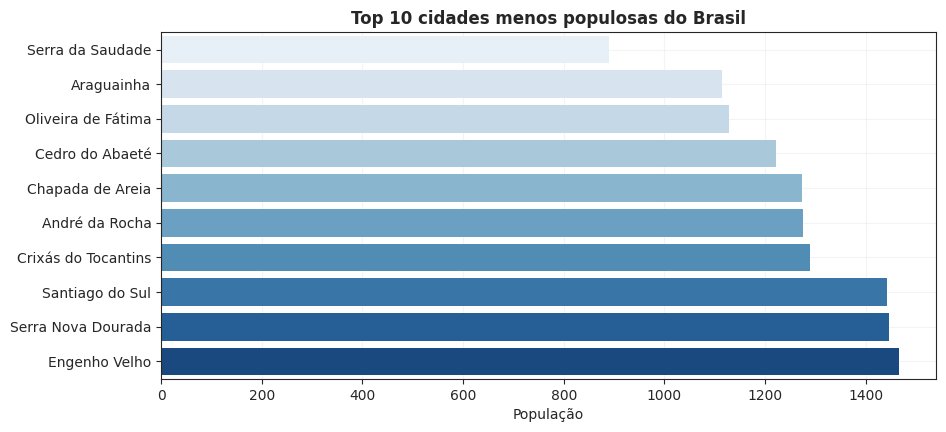

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

cidades_menos_populosas_BR = brasil_df[['cidade', 'populacao']].\
    sort_values('populacao', ascending=True).head(10)

with sns.axes_style('ticks'):
  fig, ax = plt.subplots(figsize=(10,4.5))
  sns.barplot(
      data = cidades_menos_populosas_BR,
      x = 'populacao',
      y = 'cidade',
      palette = 'Blues',
      lw=0
  )
  plt.grid(alpha=0.2)
  plt.title('Top 10 cidades menos populosas do Brasil', weight='bold', size=12)
  plt.xlabel('População', size=10)
  plt.ylabel('')

 - Gere um gráfico de pizza com a proporção da população do Brasil por região.

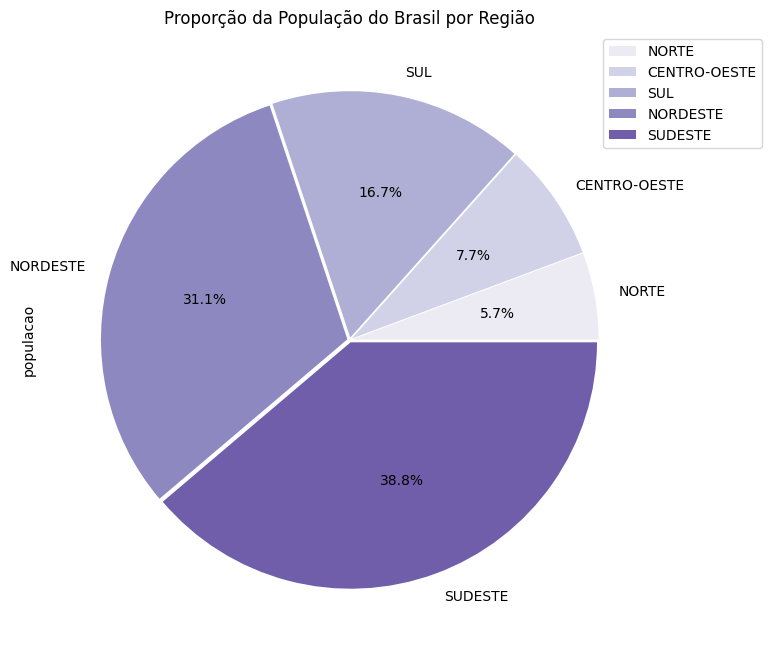

In [76]:
populacao_por_regiao = brasil_df[['regiao', 'populacao']].groupby('regiao').sum()\
    .sort_values('populacao', ascending=True)

palette_color = sns.color_palette('Purples')
explode = [0.01, 0.01, 0.01, 0.01, 0.01]

populacao_por_regiao.plot.pie(y='populacao',
                              title="Proporção da População do Brasil por Região",
                              figsize=(16,8),
                              explode = explode,
                              autopct='%1.1f%%',
                              colors=palette_color
).legend(bbox_to_anchor=(0.9, 1));